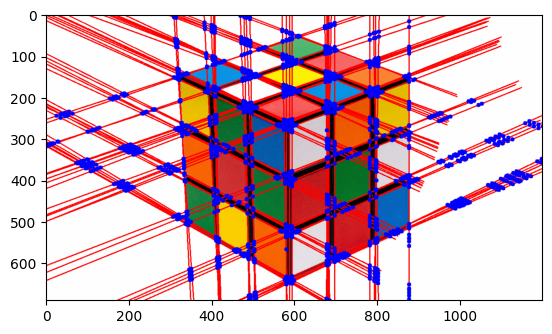

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
def are_lines_parallel(theta1, theta2, threshold=np.pi / 180 * 10):
    return np.abs(theta1 - theta2) < threshold

# Load the image
rcube = 'img.jpg'
image = cv2.imread(rcube)

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply edge detection (you can use other methods like Canny)
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

# Detect lines in the image using Hough Transform
lines = cv2.HoughLines(edges, 1, np.pi / 180, 100)

# Draw the lines on the image
for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Compute vanishing points by finding intersections of non-parallel lines
intersection_points = []
for i in range(len(lines)):
    for j in range(i + 1, len(lines)):
        line1 = lines[i][0]
        line2 = lines[j][0]
        rho1, theta1 = line1
        rho2, theta2 = line2

        if not are_lines_parallel(theta1, theta2):
            A = np.array([[np.cos(theta1), np.sin(theta1)], [np.cos(theta2), np.sin(theta2)]])
            b = np.array([rho1, rho2])
            intersection_point = np.linalg.solve(A, b)
            intersection_points.append(tuple(map(int, intersection_point)))

# Draw the intersection points on the image (optional)
for point in intersection_points:
    cv2.circle(image, point, 5, (255, 0, 0), -1)

# Display the image with lines and intersection points
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()


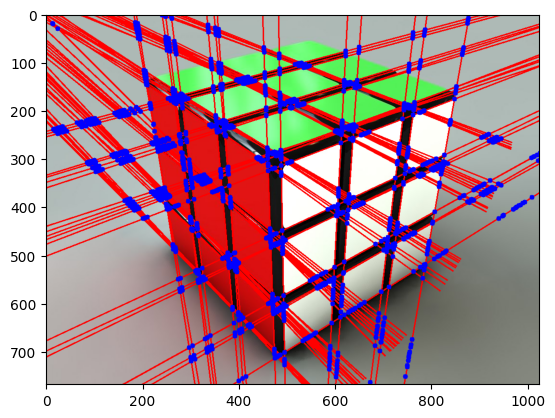

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
def are_lines_parallel(theta1, theta2, threshold=np.pi / 180 * 10):
    return np.abs(theta1 - theta2) < threshold

# Load the image
rcube = 'img2.jpg'
image = cv2.imread(rcube)

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply edge detection (you can use other methods like Canny)
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

# Detect lines in the image using Hough Transform
lines = cv2.HoughLines(edges, 1, np.pi / 180, 100)

# Draw the lines on the image
for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Compute vanishing points by finding intersections of non-parallel lines
intersection_points = []
for i in range(len(lines)):
    for j in range(i + 1, len(lines)):
        line1 = lines[i][0]
        line2 = lines[j][0]
        rho1, theta1 = line1
        rho2, theta2 = line2

        if not are_lines_parallel(theta1, theta2):
            A = np.array([[np.cos(theta1), np.sin(theta1)], [np.cos(theta2), np.sin(theta2)]])
            b = np.array([rho1, rho2])
            intersection_point = np.linalg.solve(A, b)
            intersection_points.append(tuple(map(int, intersection_point)))

# Draw the intersection points on the image (optional)
for point in intersection_points:
    cv2.circle(image, point, 5, (255, 0, 0), -1)

# Display the image with lines and intersection points
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()


# In this observation, it becomes evident that beyond the edges of the image, three vanishing points emerge: one on the right, one on the left, and one at the bottom.

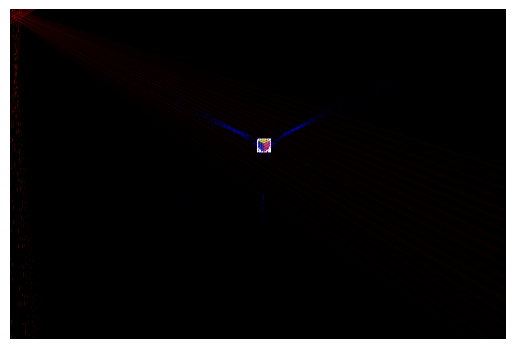

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

img = cv2.imread('img3.jpg')  #third image test

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Adjust Canny edge detection parameters
edges = cv2.Canny(gray, threshold1=50, threshold2=150)

# Adjust Hough transform parameters
lines = cv2.HoughLines(edges, 1, np.pi / 180, threshold=100)

# Convert polar coordinates to Cartesian coordinates
cart_lines = []
for line in lines:
    rho, theta = line[0]

    # Skip lines with near-zero or 180-degree angles
    if np.abs(np.tan(theta)) < 1e-6 or np.abs(np.tan(theta - np.pi/2)) < 1e-6:
        continue

    m = -1 / np.tan(theta)
    b = rho / np.sin(theta)
    cart_lines.append((m, b))

# Find intersection point of lines
vp = []
for i in range(len(cart_lines)):
    for j in range(i + 1, len(cart_lines)):
        m1 = cart_lines[i][0]
        b1 = cart_lines[i][1]
        m2 = cart_lines[j][0]
        b2 = cart_lines[j][1]

        # Skip lines with parallel slopes
        if abs(m1 - m2) < 1e-6:
            continue

        x0 = (b2 - b1) / (m1 - m2)
        y0 = m1 * x0 + b1

        # Skip lines with NaN values
        if np.isnan(x0) or np.isnan(y0):
            continue

        x0, y0 = int(np.round(x0)), int(np.round(y0))
        vp.append((x0, y0))

# Calculate the minimum and maximum x and y coordinates of all vanishing points
min_x = min([p[0] for p in vp])
max_x = max([p[0] for p in vp])
min_y = min([p[1] for p in vp])
max_y = max([p[1] for p in vp])

# Compute the amount by which the image needs to be extended in each direction
top = abs(min_y) if min_y < 0 else 0
bottom = max_y - img.shape[0] + 1 if max_y > img.shape[0] else 0
left = abs(min_x) if min_x < 0 else 0
right = max_x - img.shape[1] + 1 if max_x > img.shape[1] else 0

# Extend the image using the np.pad() function
img = np.pad(img, ((top, bottom), (left, right), (0, 0)), mode='constant')

# Update the coordinates of the vanishing points to match their new positions in the extended image
vp = [(p[0] + left, p[1] + top) for p in vp]

# Draw the lines and intersection points on the extended image
for line in cart_lines:
    m, b = line
    x1 = 0
    y1 = int(b)
    x2 = img.shape[1]
    y2 = int(m * x2 + b)
    cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 1)

for p in vp:
    cv2.circle(img, p, 5, (255, 0, 0), -1)

# Save the extended image
output_path = 'extended_image.jpg'
cv2.imwrite(output_path, img)

# Display the image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


## **To enhance the image for a clearer understanding of the convergence of lines, we enlarged the image. By doing so, we aimed to provide a more distinct view of the intersection points, as illustrated by the blue lines.**

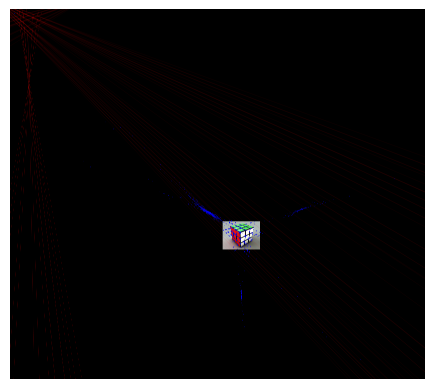

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

img = cv2.imread('img2.jpg')  #third image test

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Adjust Canny edge detection parameters
edges = cv2.Canny(gray, threshold1=50, threshold2=150)

# Adjust Hough transform parameters
lines = cv2.HoughLines(edges, 1, np.pi / 180, threshold=100)

# Convert polar coordinates to Cartesian coordinates
cart_lines = []
for line in lines:
    rho, theta = line[0]

    # Skip lines with near-zero or 180-degree angles
    if np.abs(np.tan(theta)) < 1e-6 or np.abs(np.tan(theta - np.pi/2)) < 1e-6:
        continue

    m = -1 / np.tan(theta)
    b = rho / np.sin(theta)
    cart_lines.append((m, b))

# Find intersection point of lines
vp = []
for i in range(len(cart_lines)):
    for j in range(i + 1, len(cart_lines)):
        m1 = cart_lines[i][0]
        b1 = cart_lines[i][1]
        m2 = cart_lines[j][0]
        b2 = cart_lines[j][1]

        # Skip lines with parallel slopes
        if abs(m1 - m2) < 1e-6:
            continue

        x0 = (b2 - b1) / (m1 - m2)
        y0 = m1 * x0 + b1

        # Skip lines with NaN values
        if np.isnan(x0) or np.isnan(y0):
            continue

        x0, y0 = int(np.round(x0)), int(np.round(y0))
        vp.append((x0, y0))

# Calculate the minimum and maximum x and y coordinates of all vanishing points
min_x = min([p[0] for p in vp])
max_x = max([p[0] for p in vp])
min_y = min([p[1] for p in vp])
max_y = max([p[1] for p in vp])

# Compute the amount by which the image needs to be extended in each direction
top = abs(min_y) if min_y < 0 else 0
bottom = max_y - img.shape[0] + 1 if max_y > img.shape[0] else 0
left = abs(min_x) if min_x < 0 else 0
right = max_x - img.shape[1] + 1 if max_x > img.shape[1] else 0

# Extend the image using the np.pad() function
img = np.pad(img, ((top, bottom), (left, right), (0, 0)), mode='constant')

# Update the coordinates of the vanishing points to match their new positions in the extended image
vp = [(p[0] + left, p[1] + top) for p in vp]

# Draw the lines and intersection points on the extended image
for line in cart_lines:
    m, b = line
    x1 = 0
    y1 = int(b)
    x2 = img.shape[1]
    y2 = int(m * x2 + b)
    cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 1)

for p in vp:
    cv2.circle(img, p, 5, (255, 0, 0), -1)

# Save the extended image
output_path = 'extended_image.jpg'
cv2.imwrite(output_path, img)

# Display the image using Matplotlib
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
